In [6]:
def col_translate(col):
    # print(col)
    text = col[8:]
    if text == '送风温度001': text = 'Supply Air'
    if text == '回风温度001': text = 'Return Air'
    if text == '水路进水温度003': text = 'Water inlet'
    if text == '冷通道温度': text = 'Cold Aisle'
    chinese_col = col[:8] +'\n'+ text
    # print(chinese_col)
    return chinese_col
# col_translate

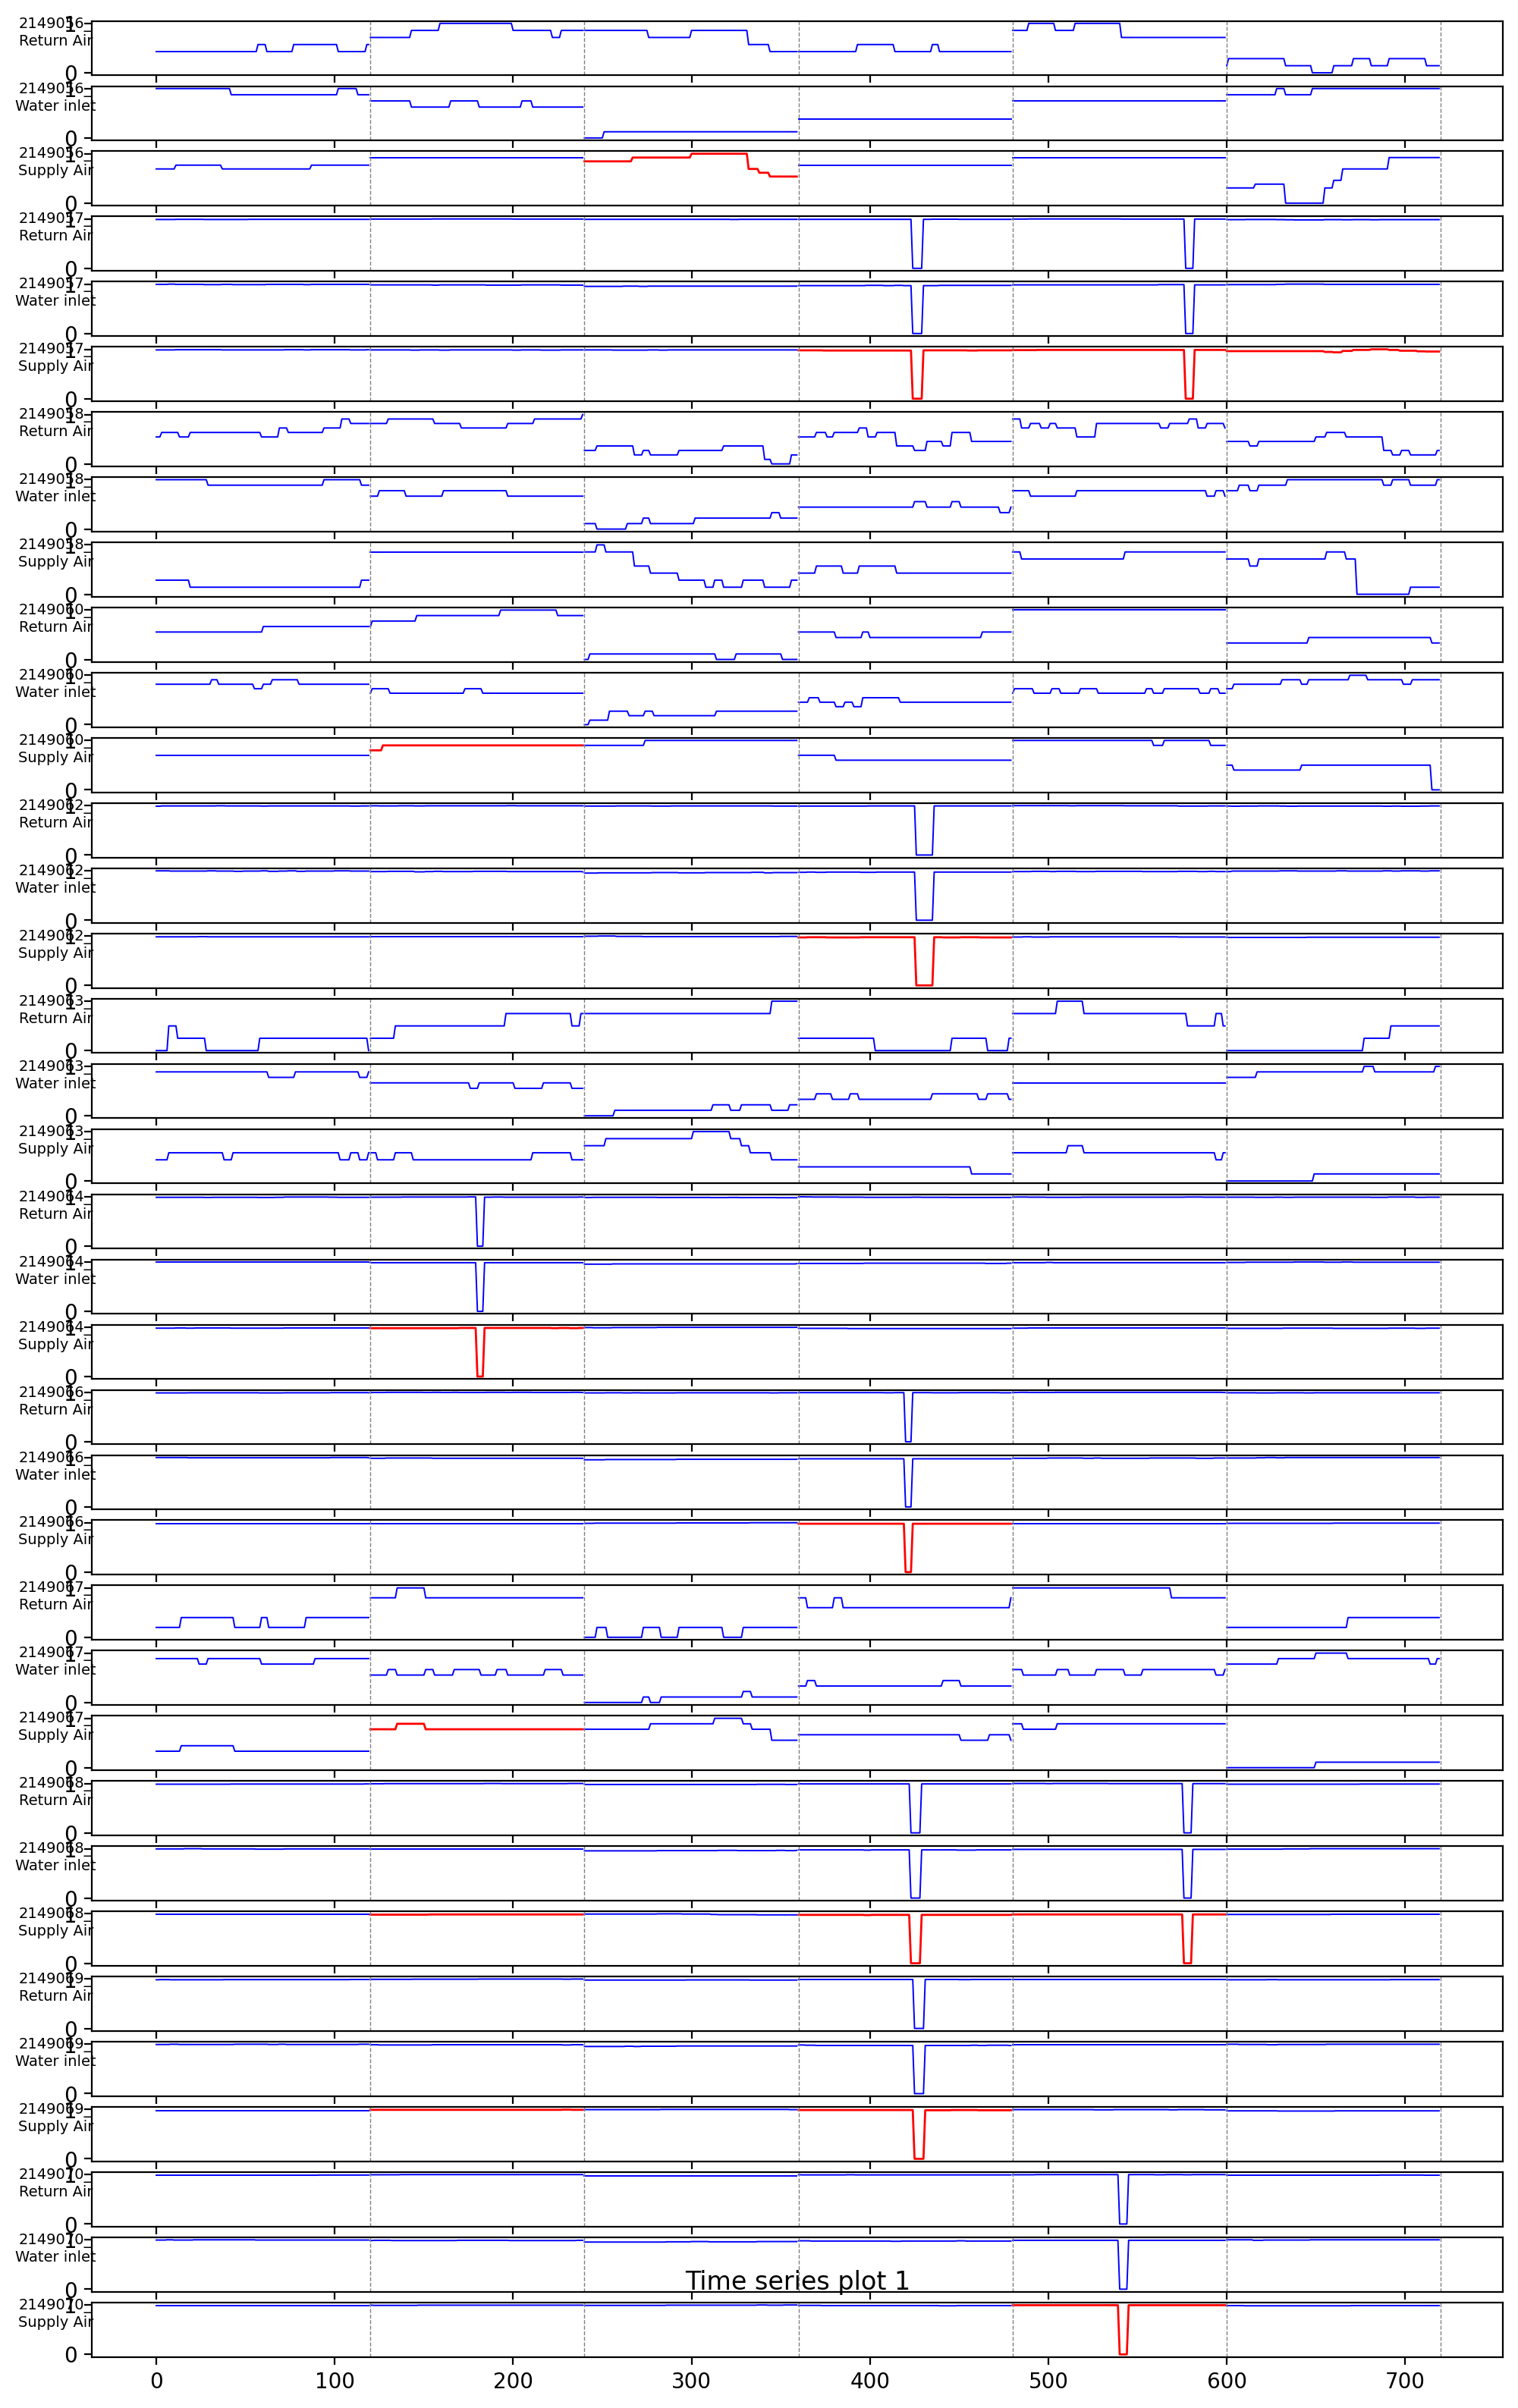

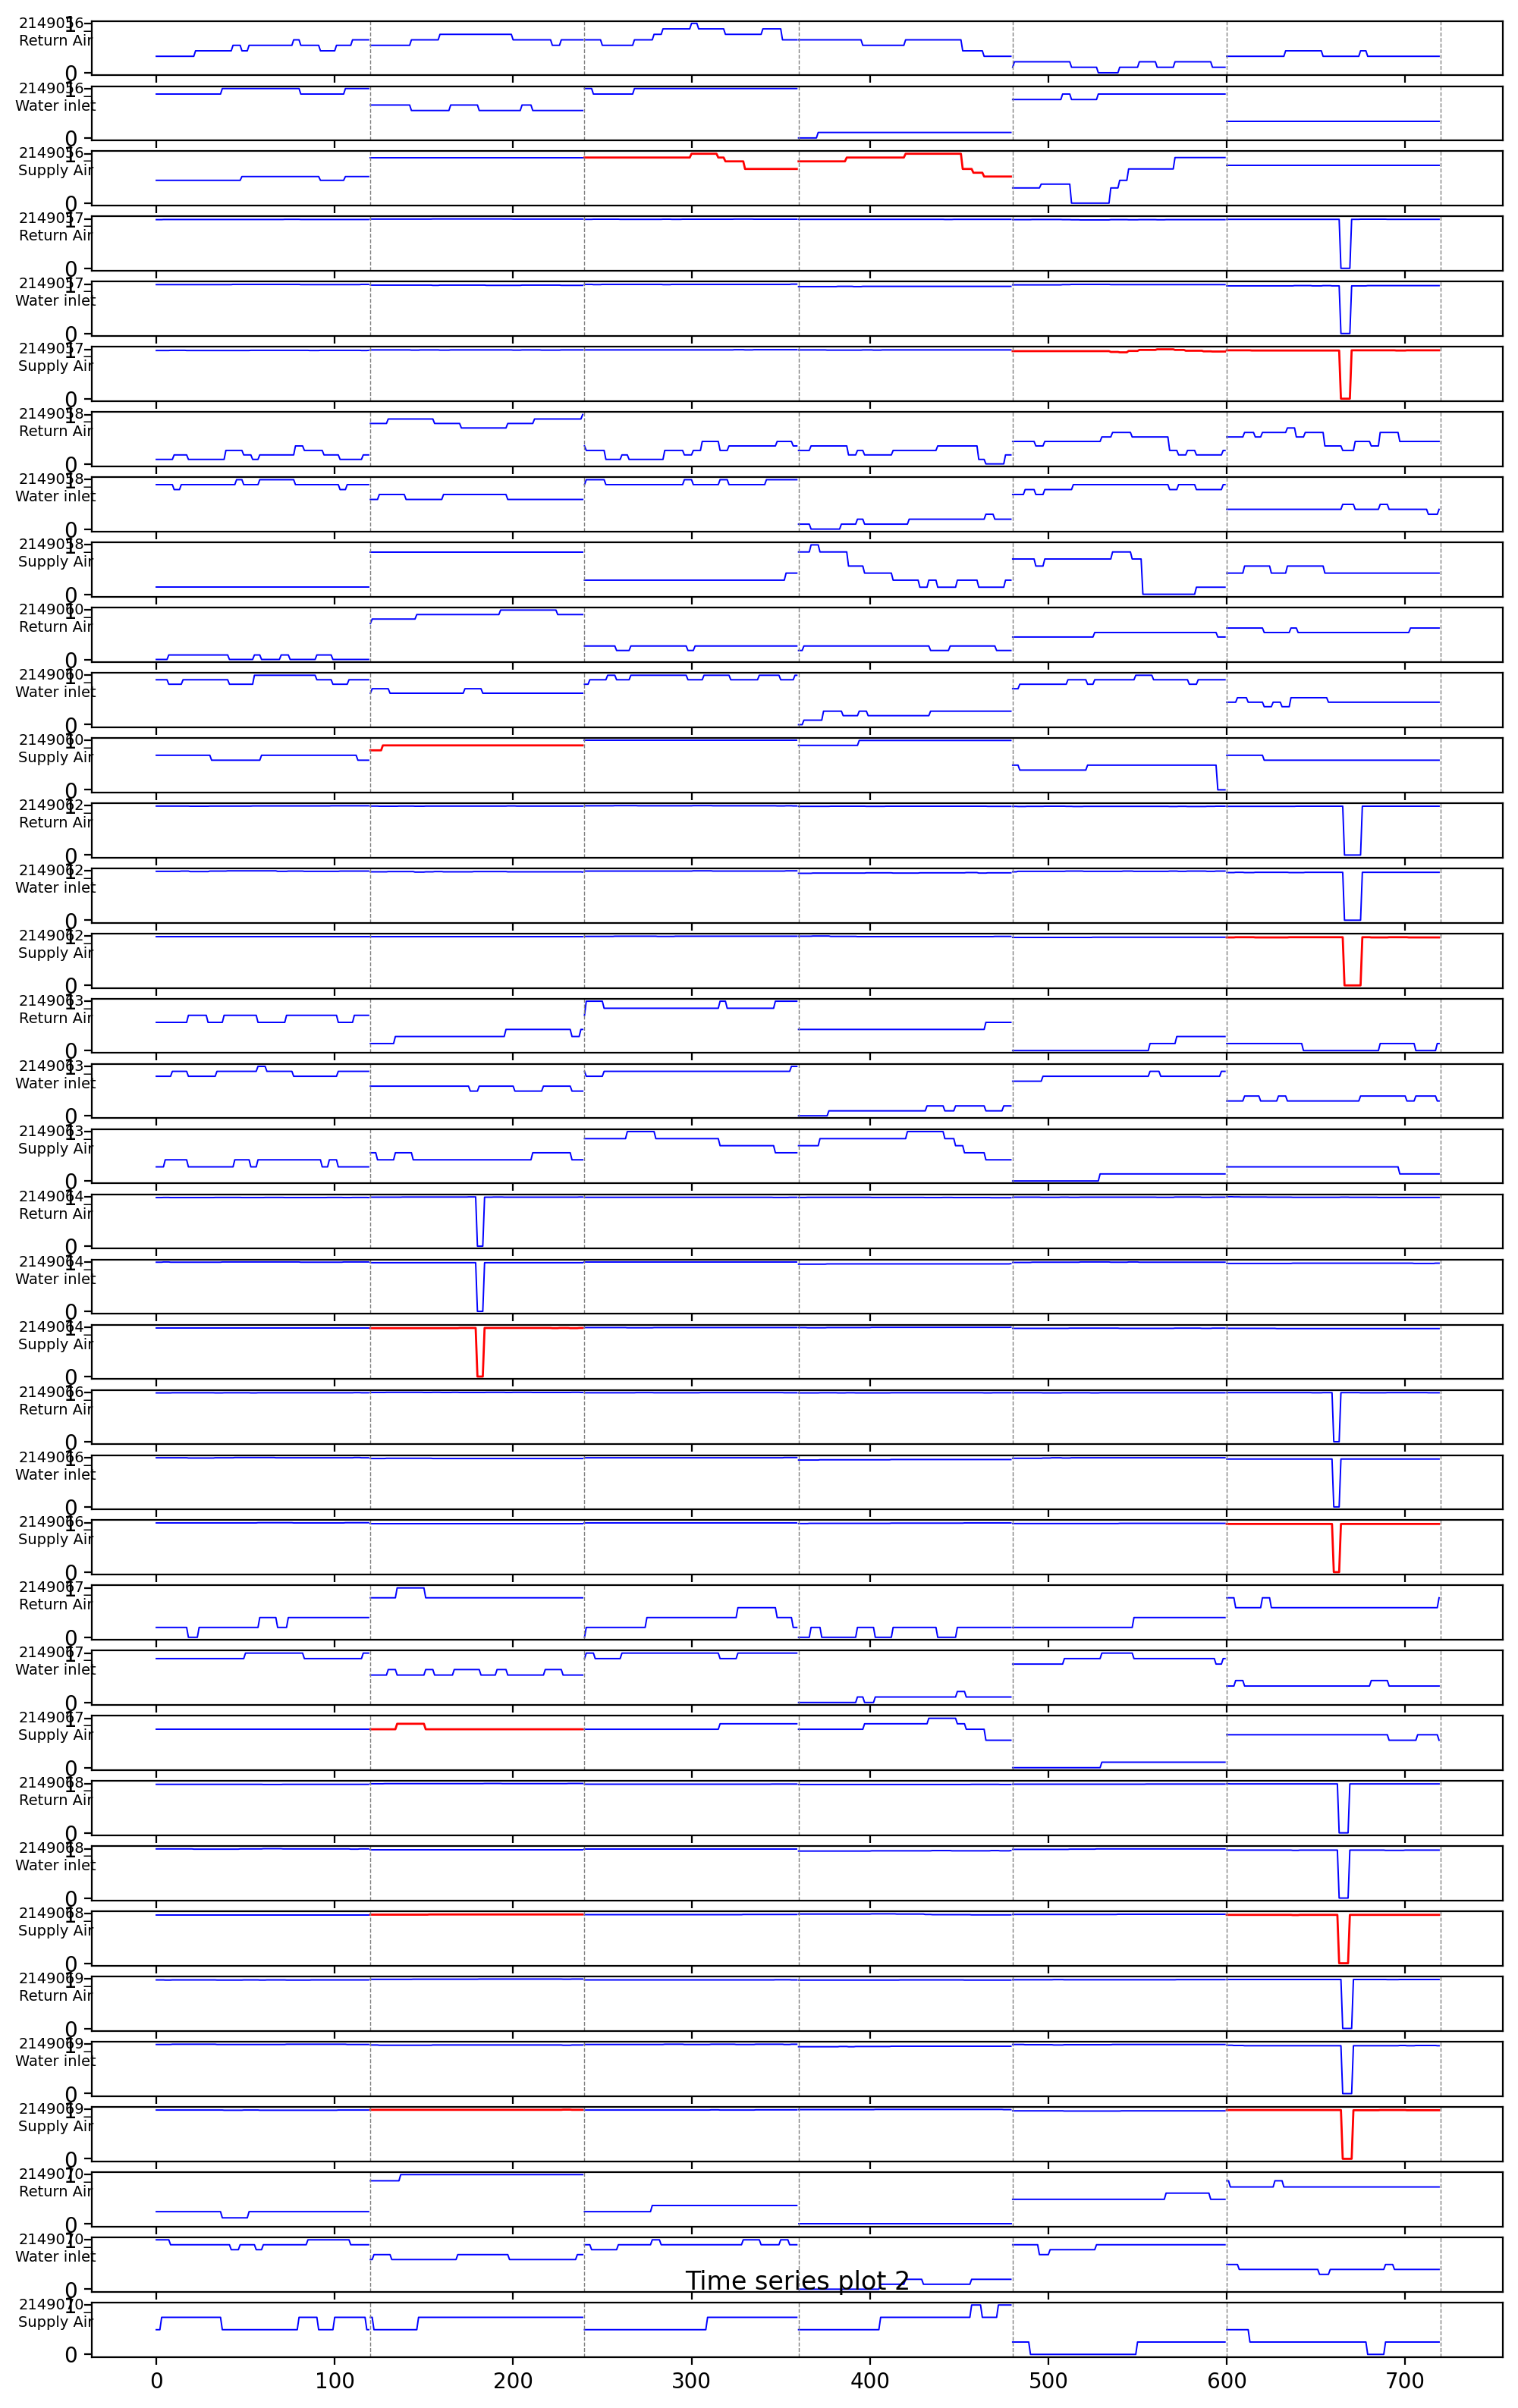

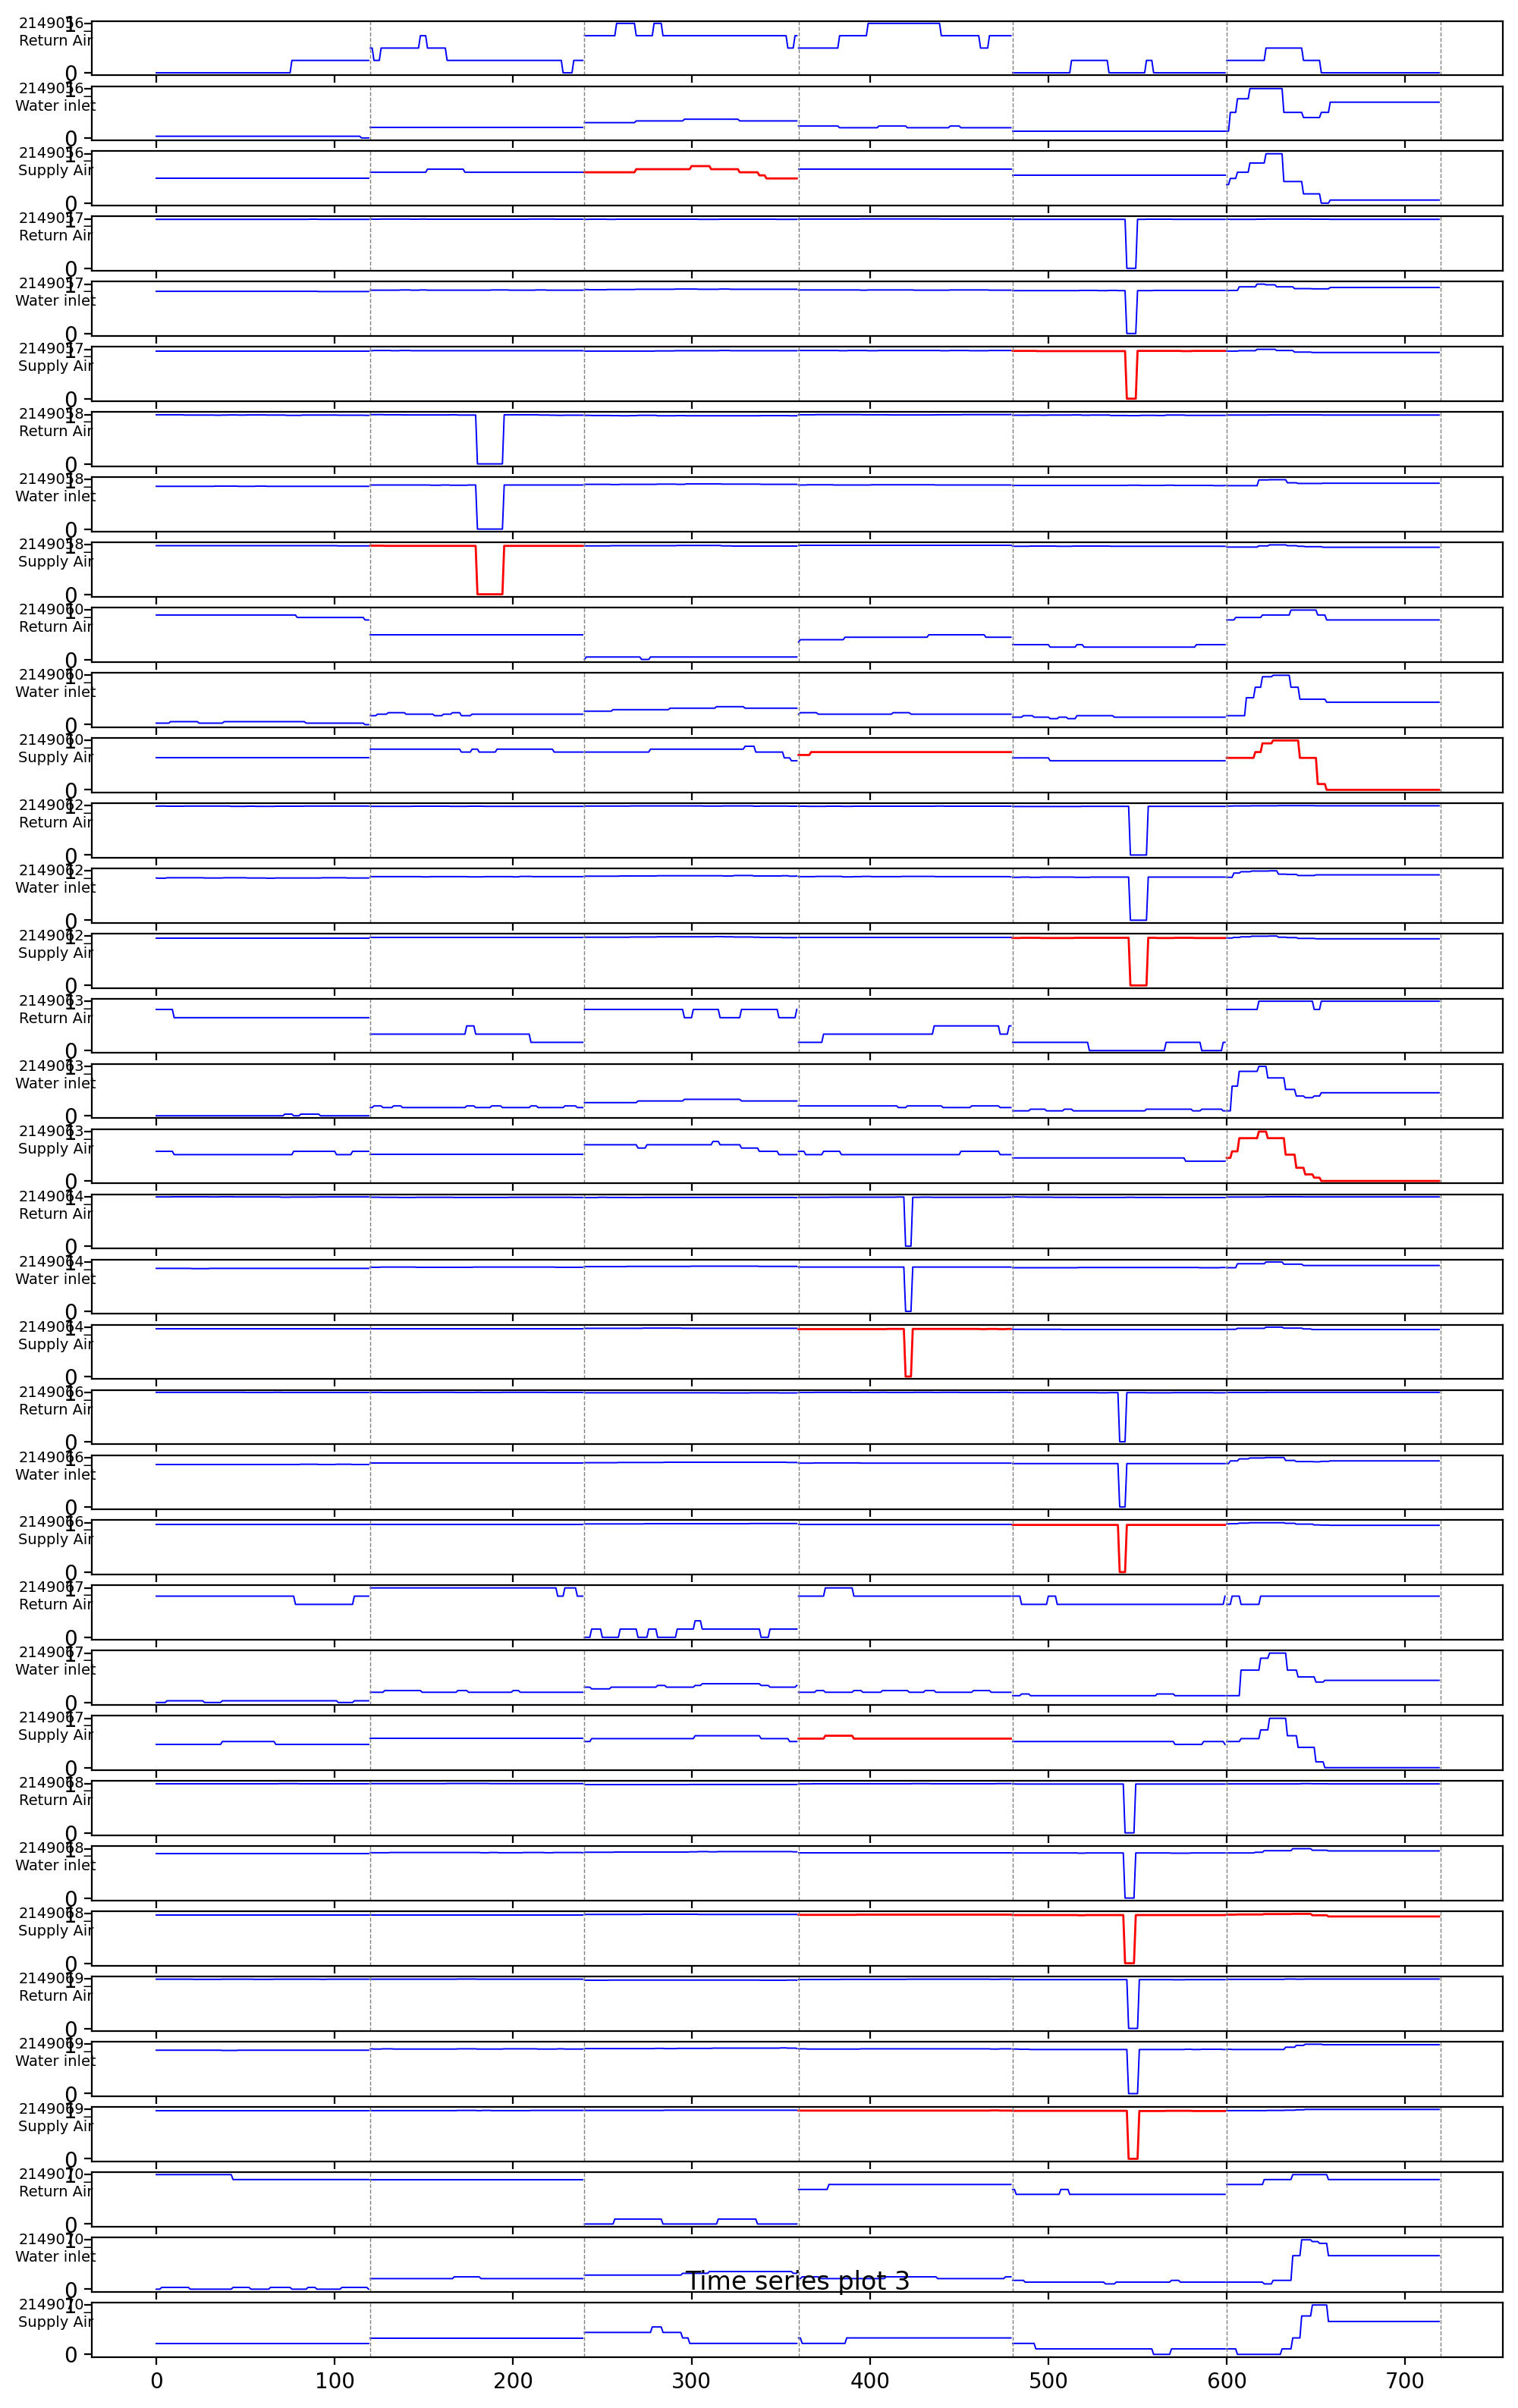

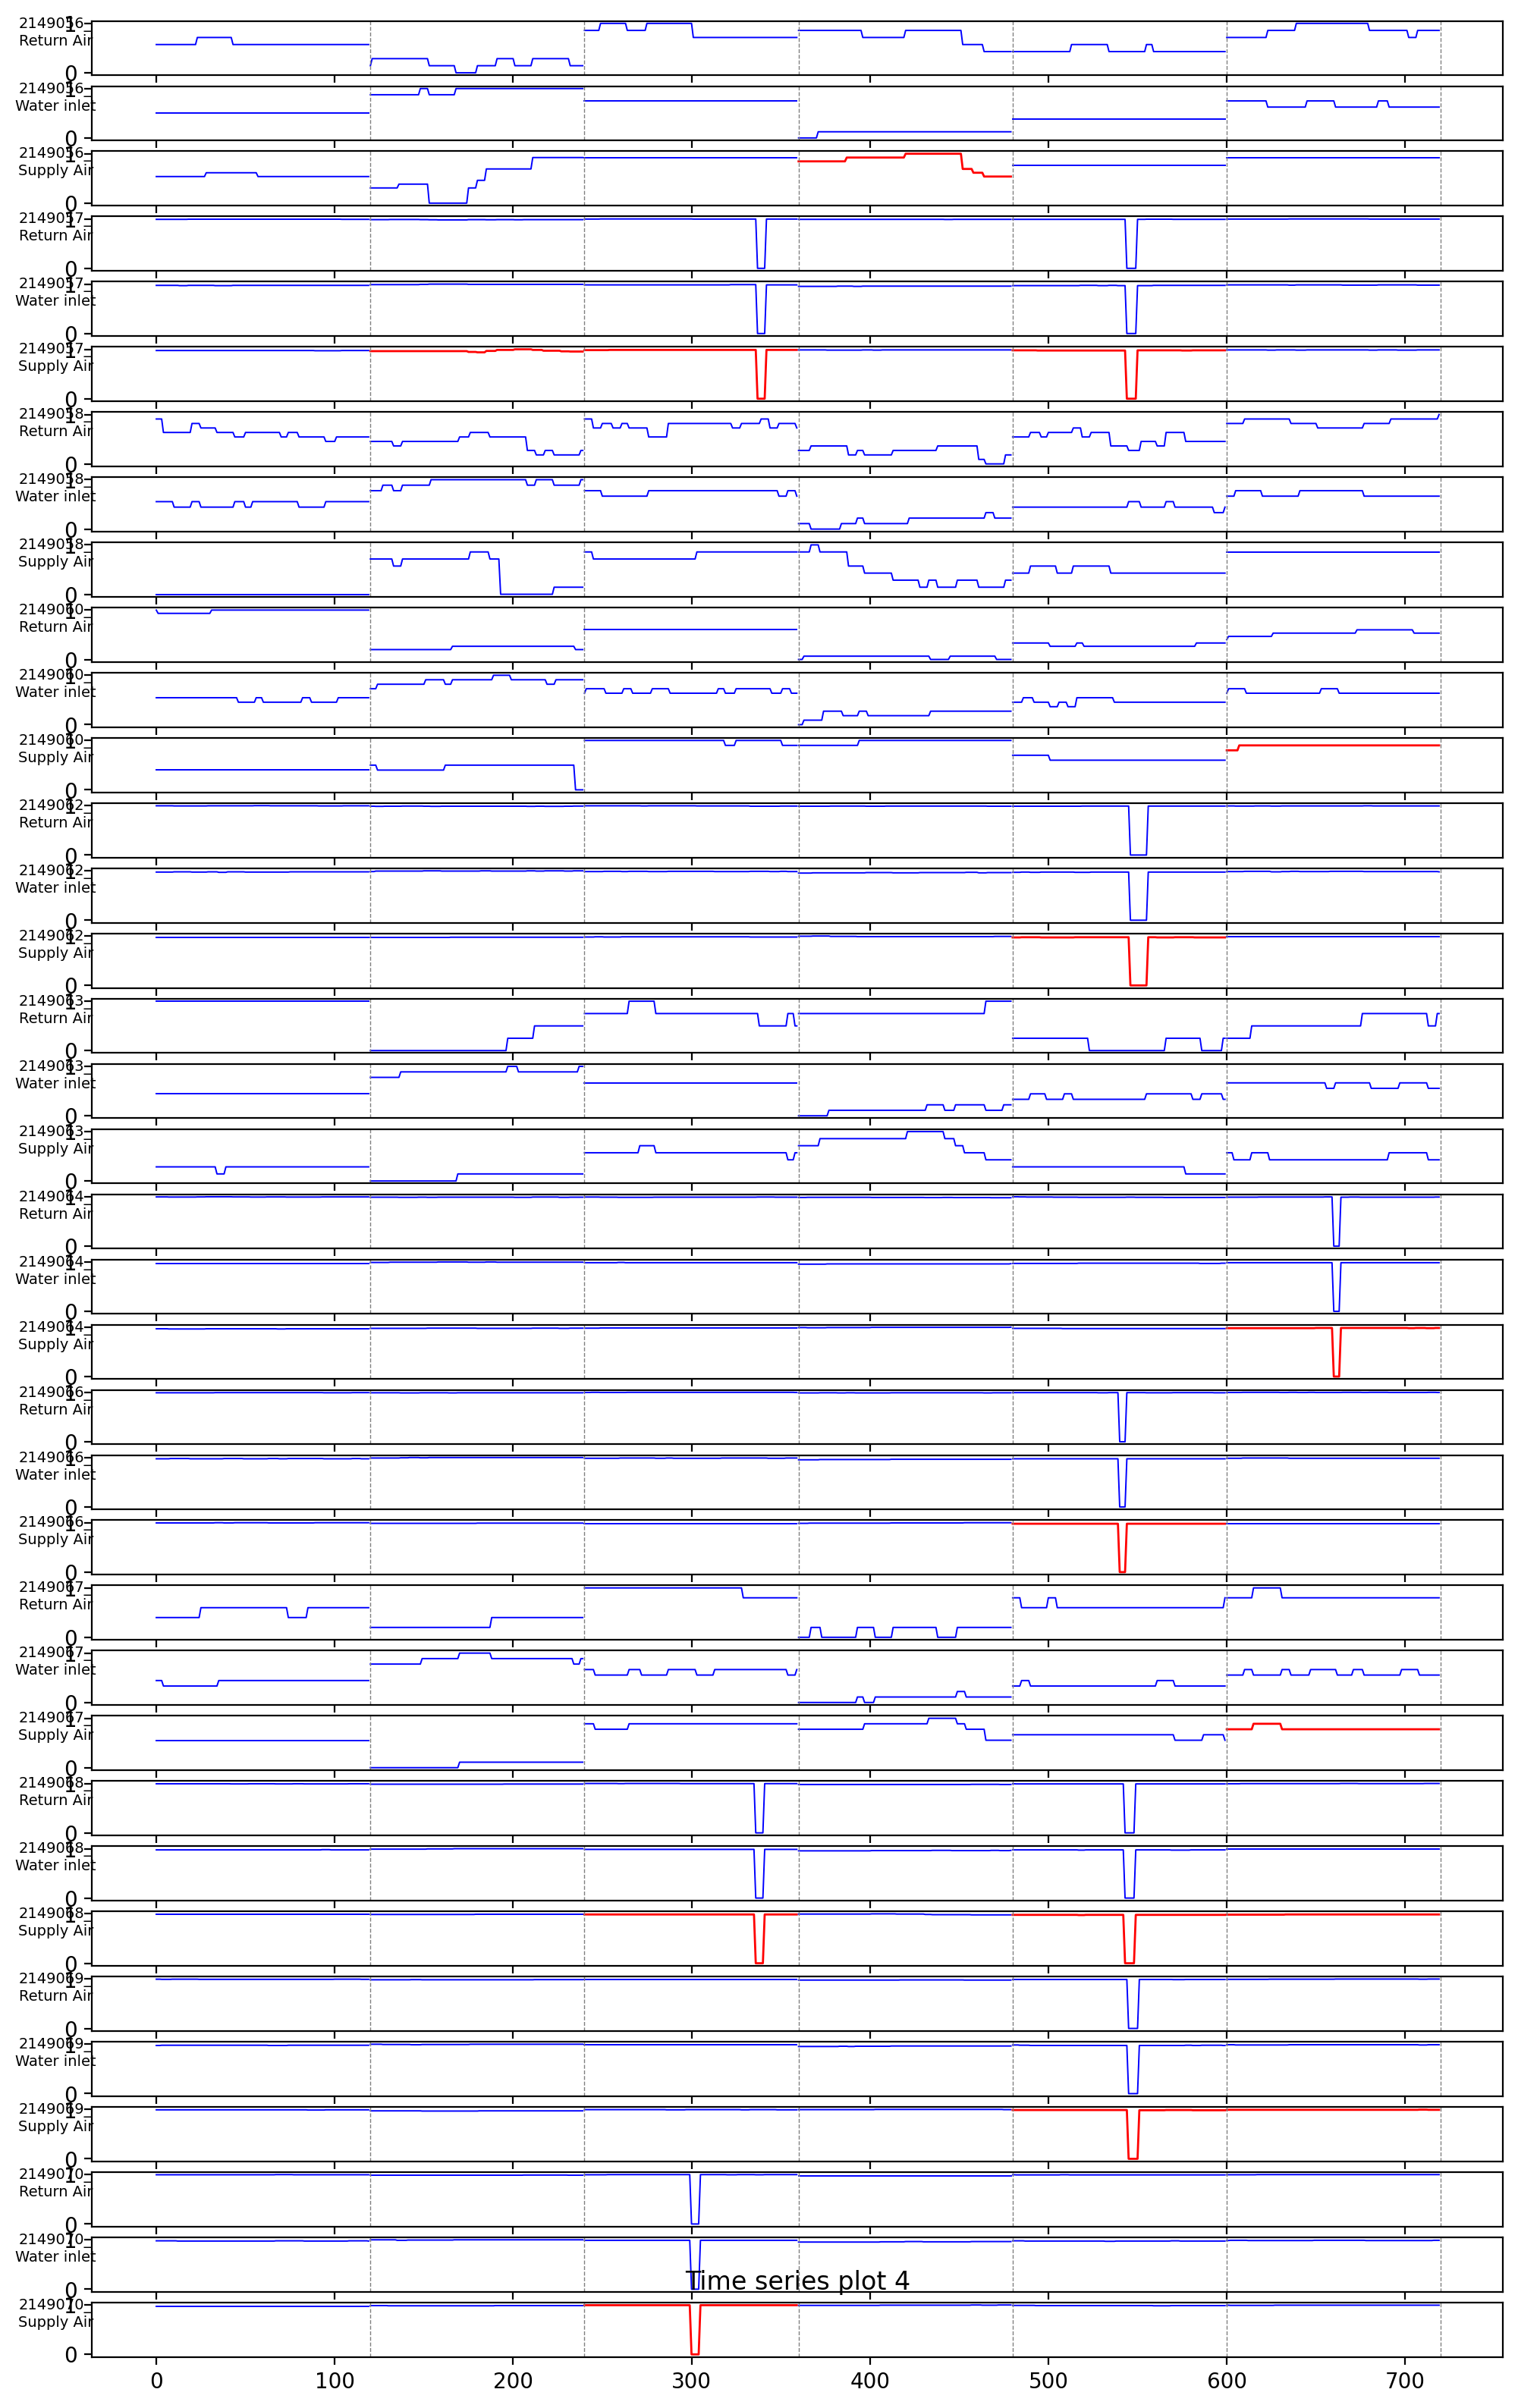

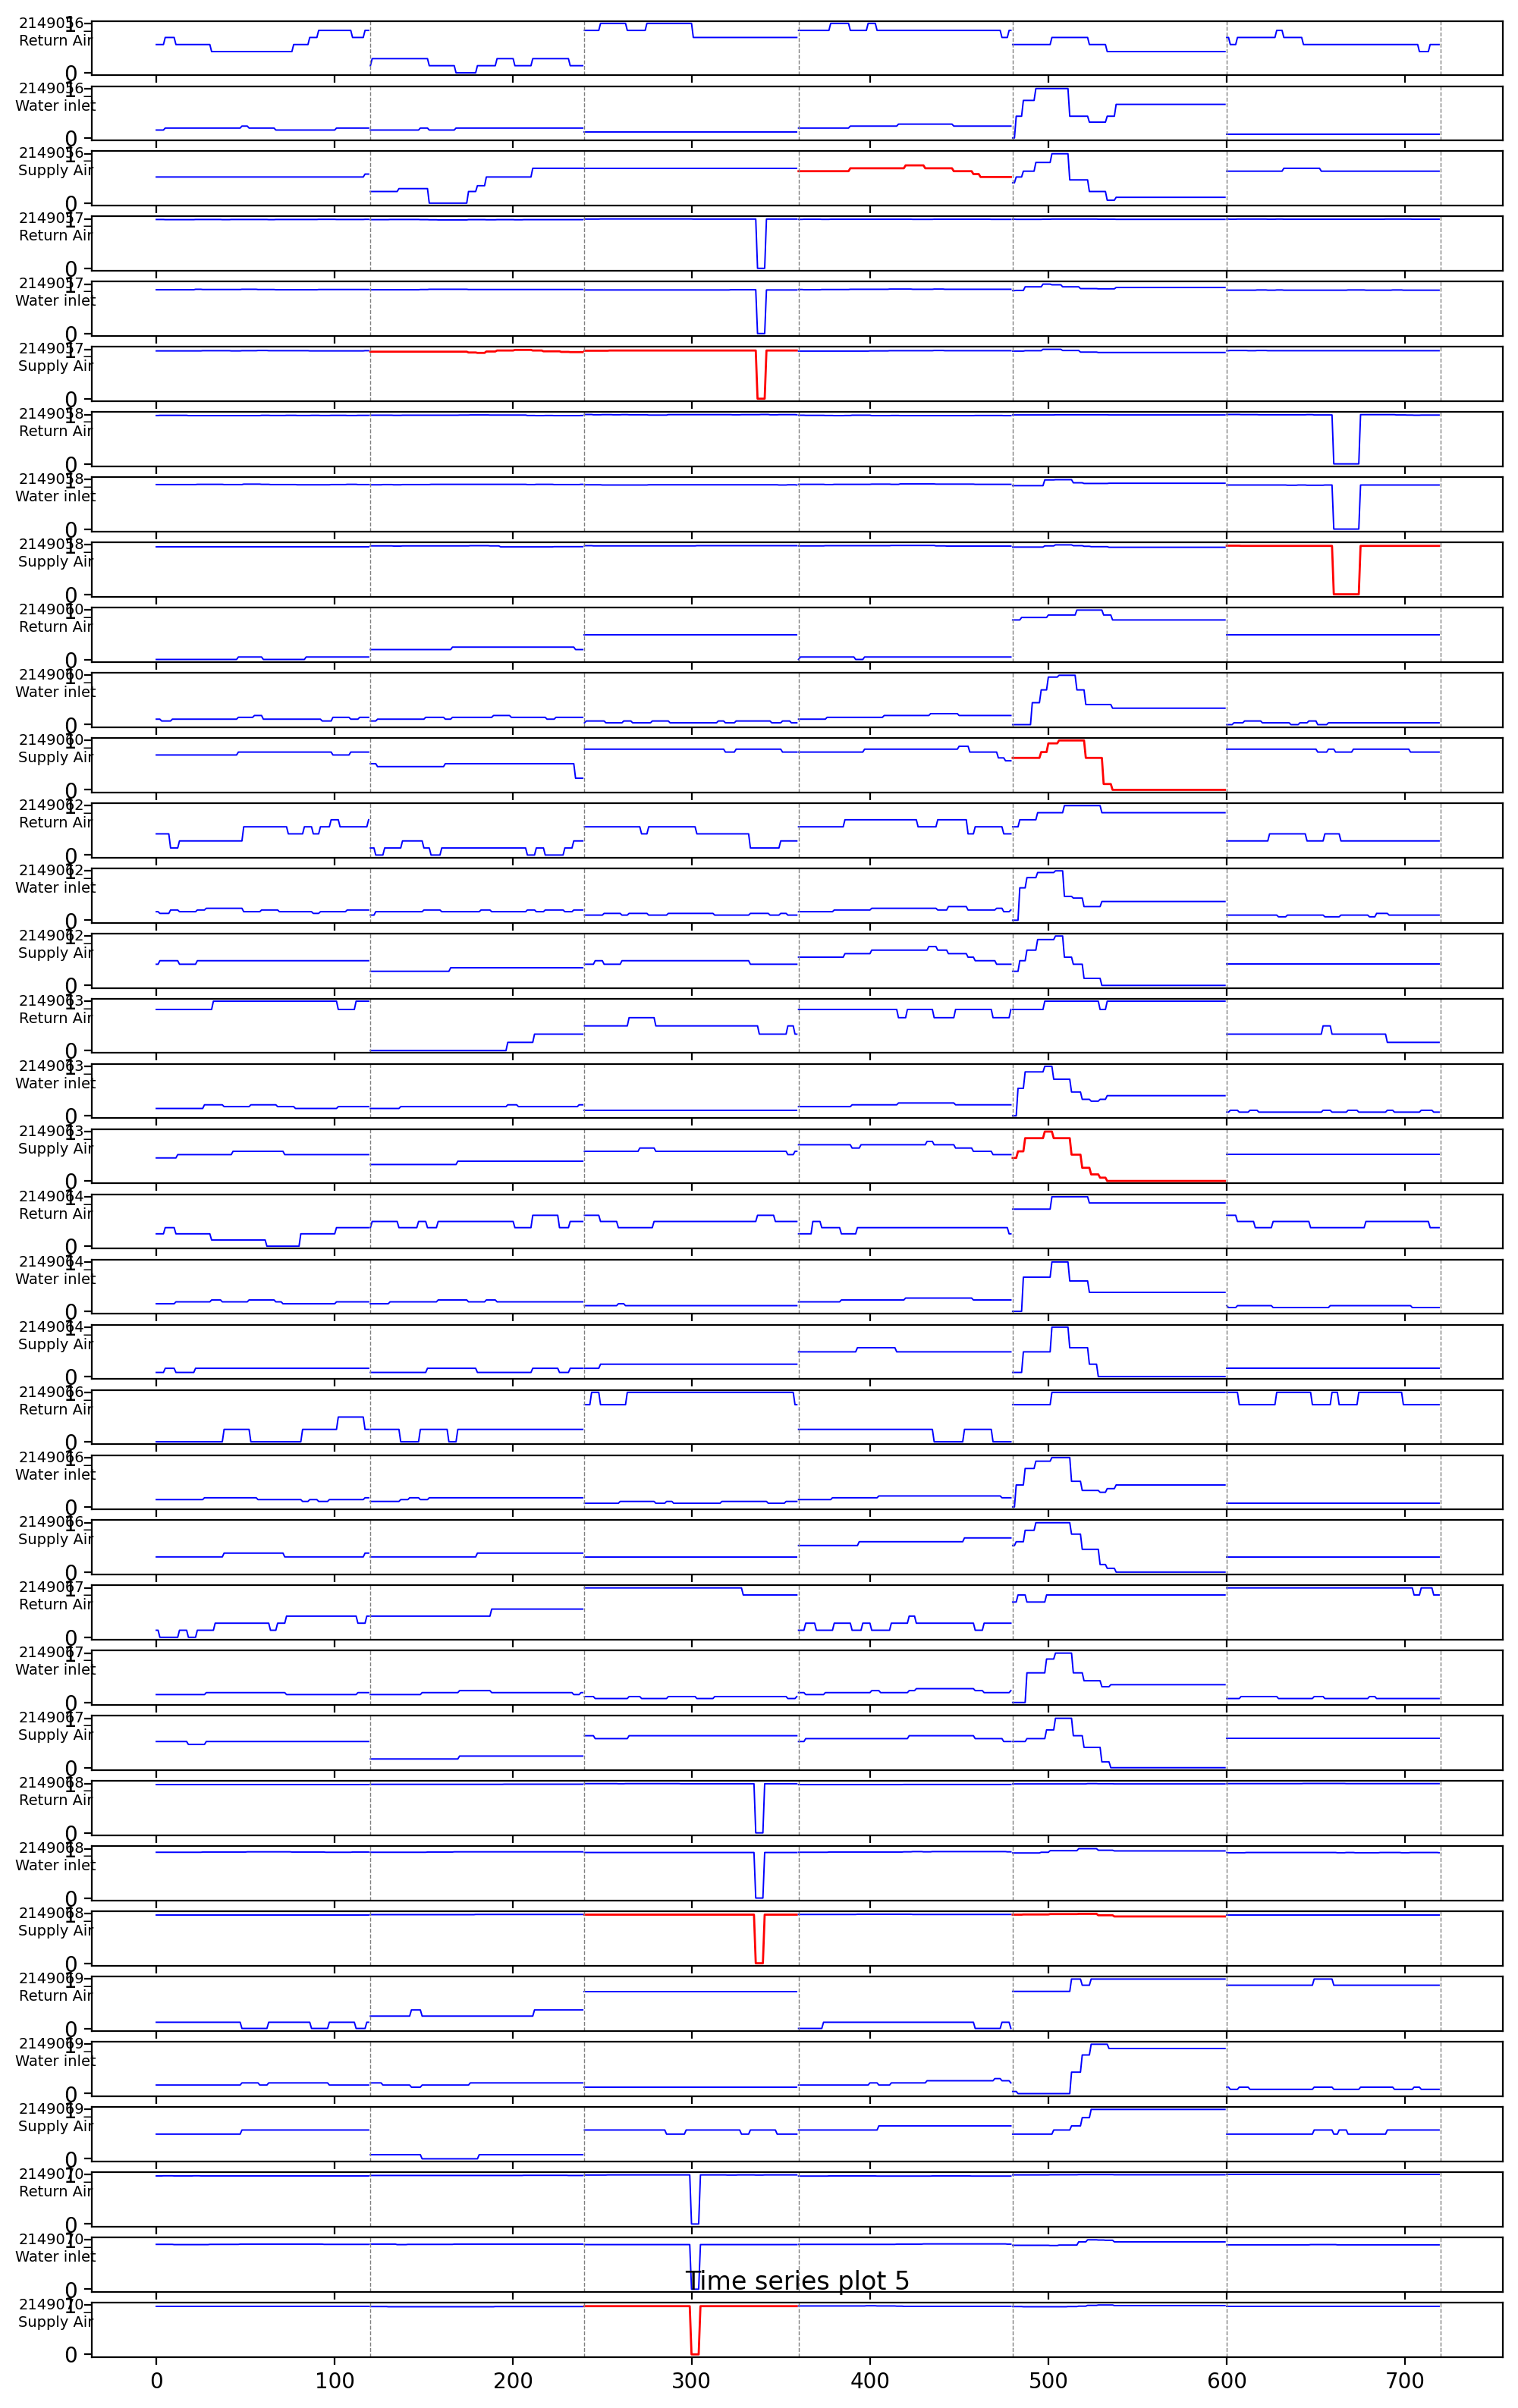

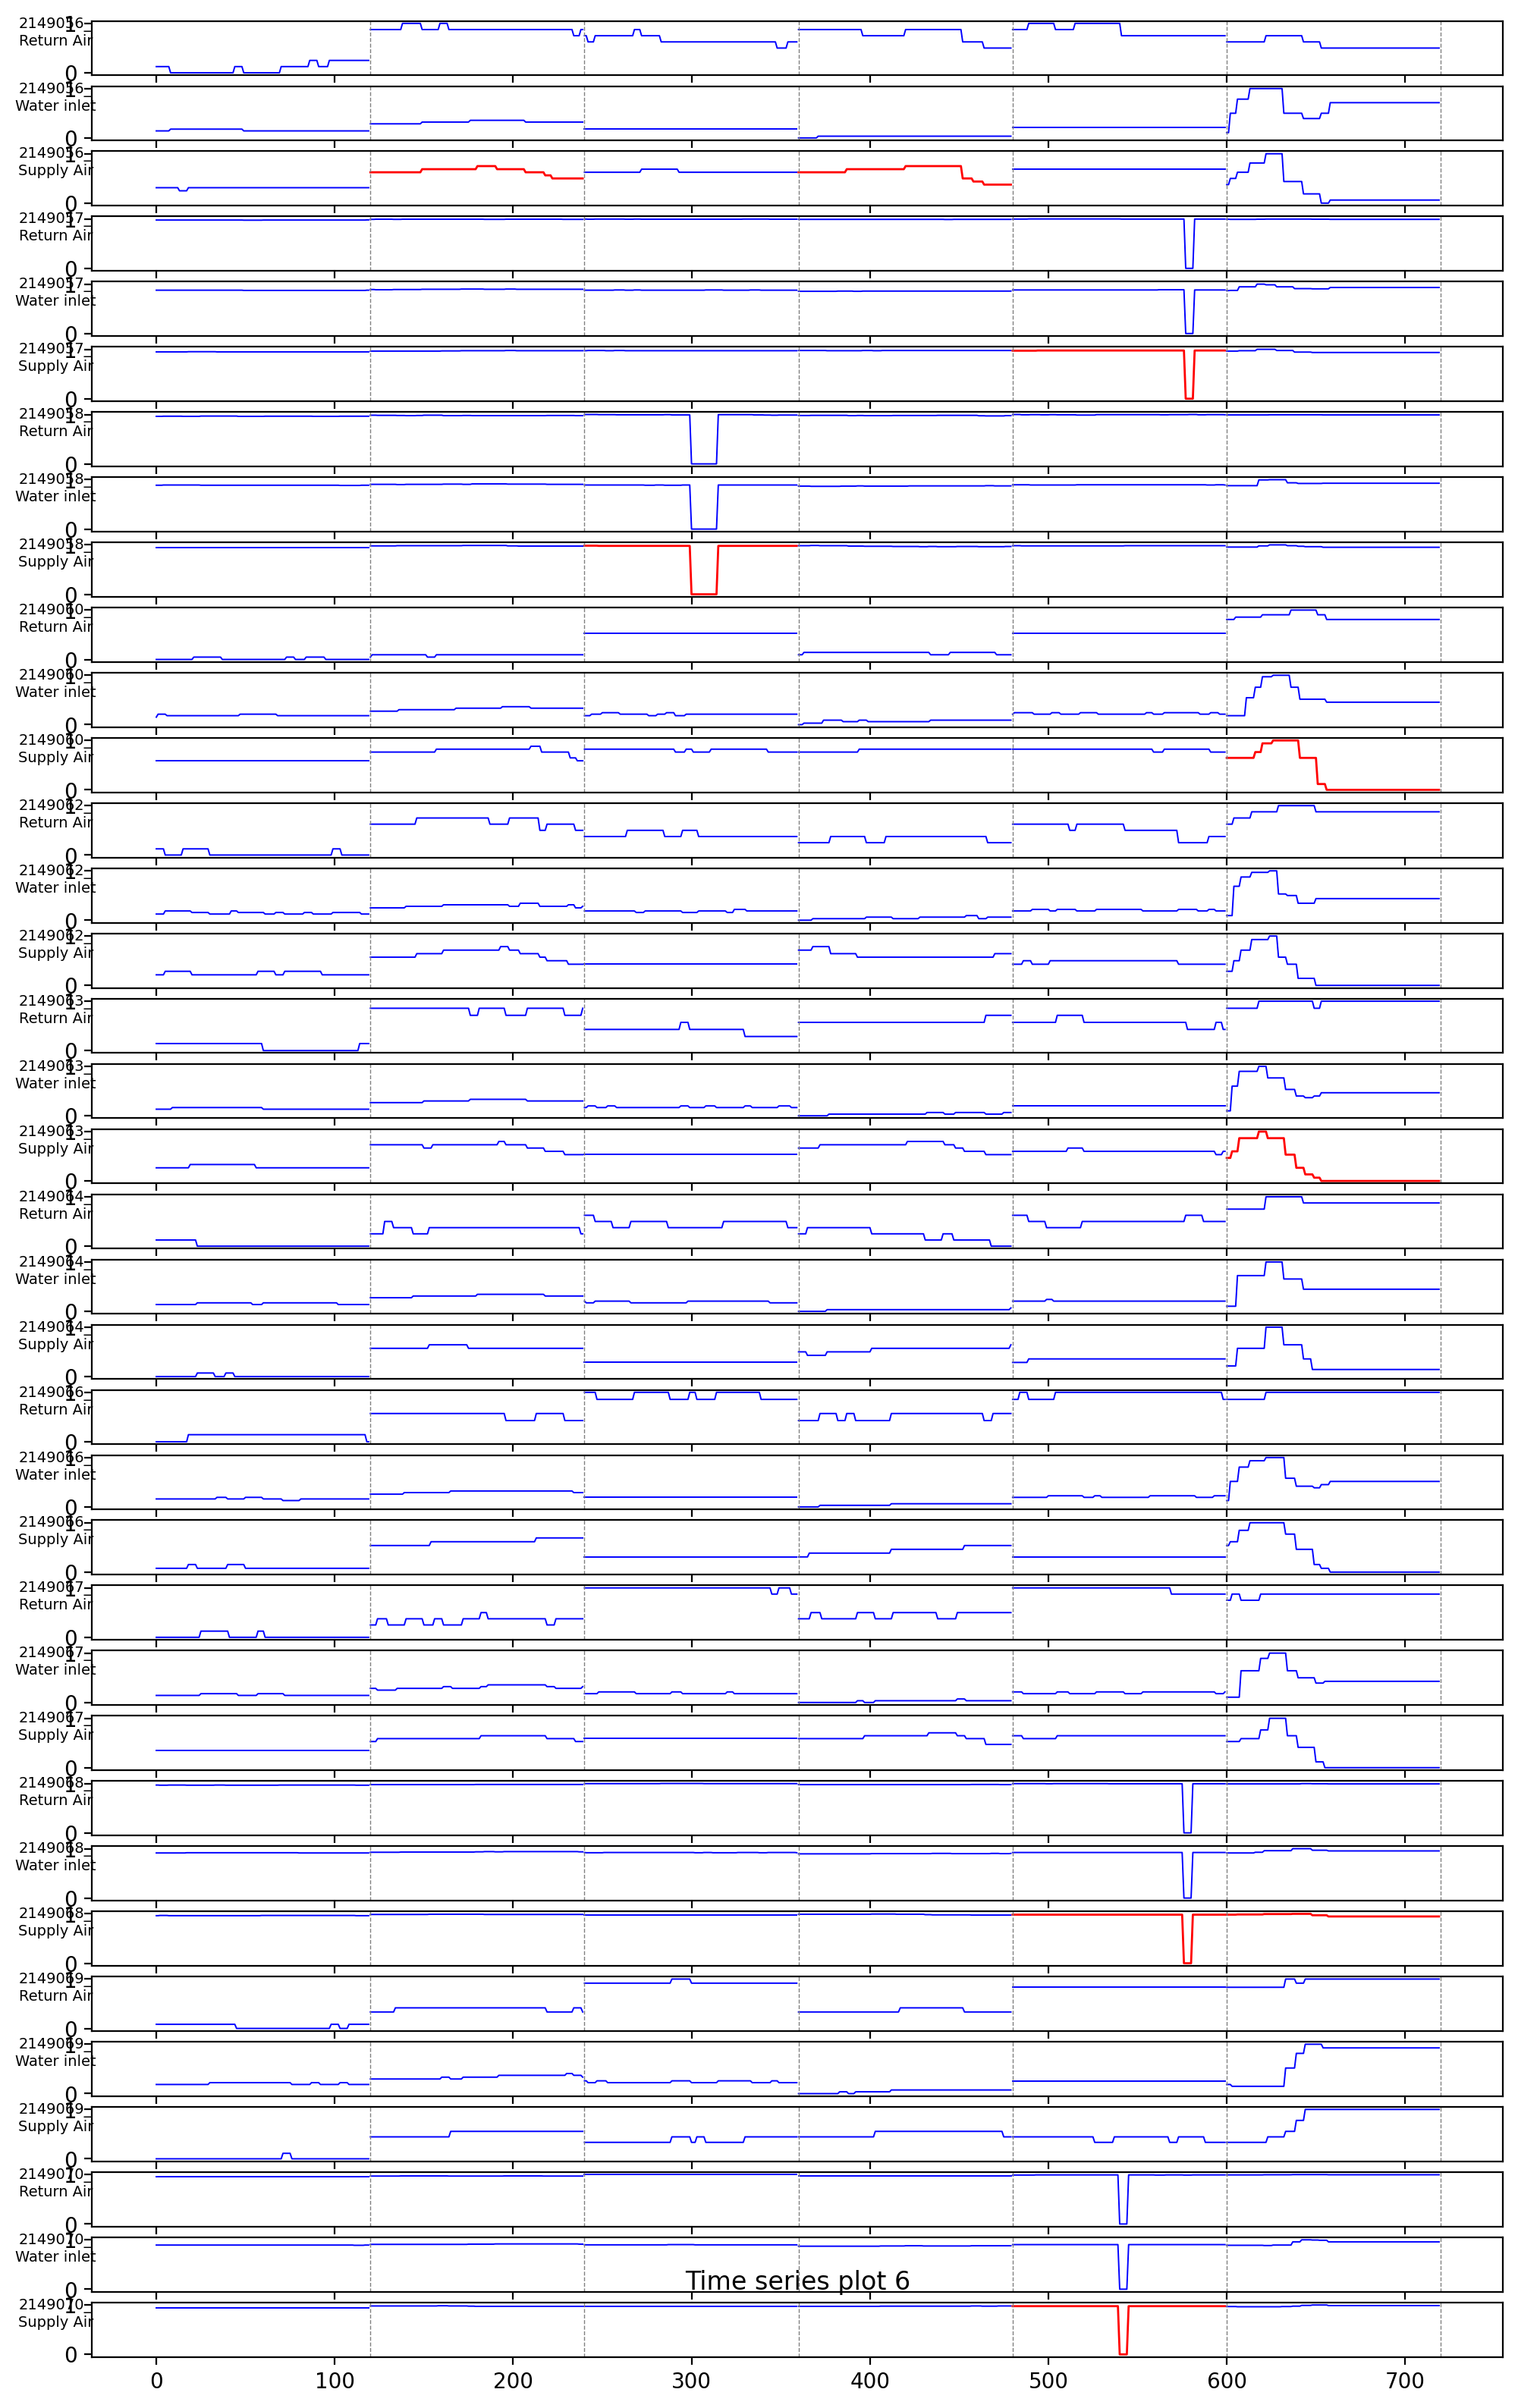

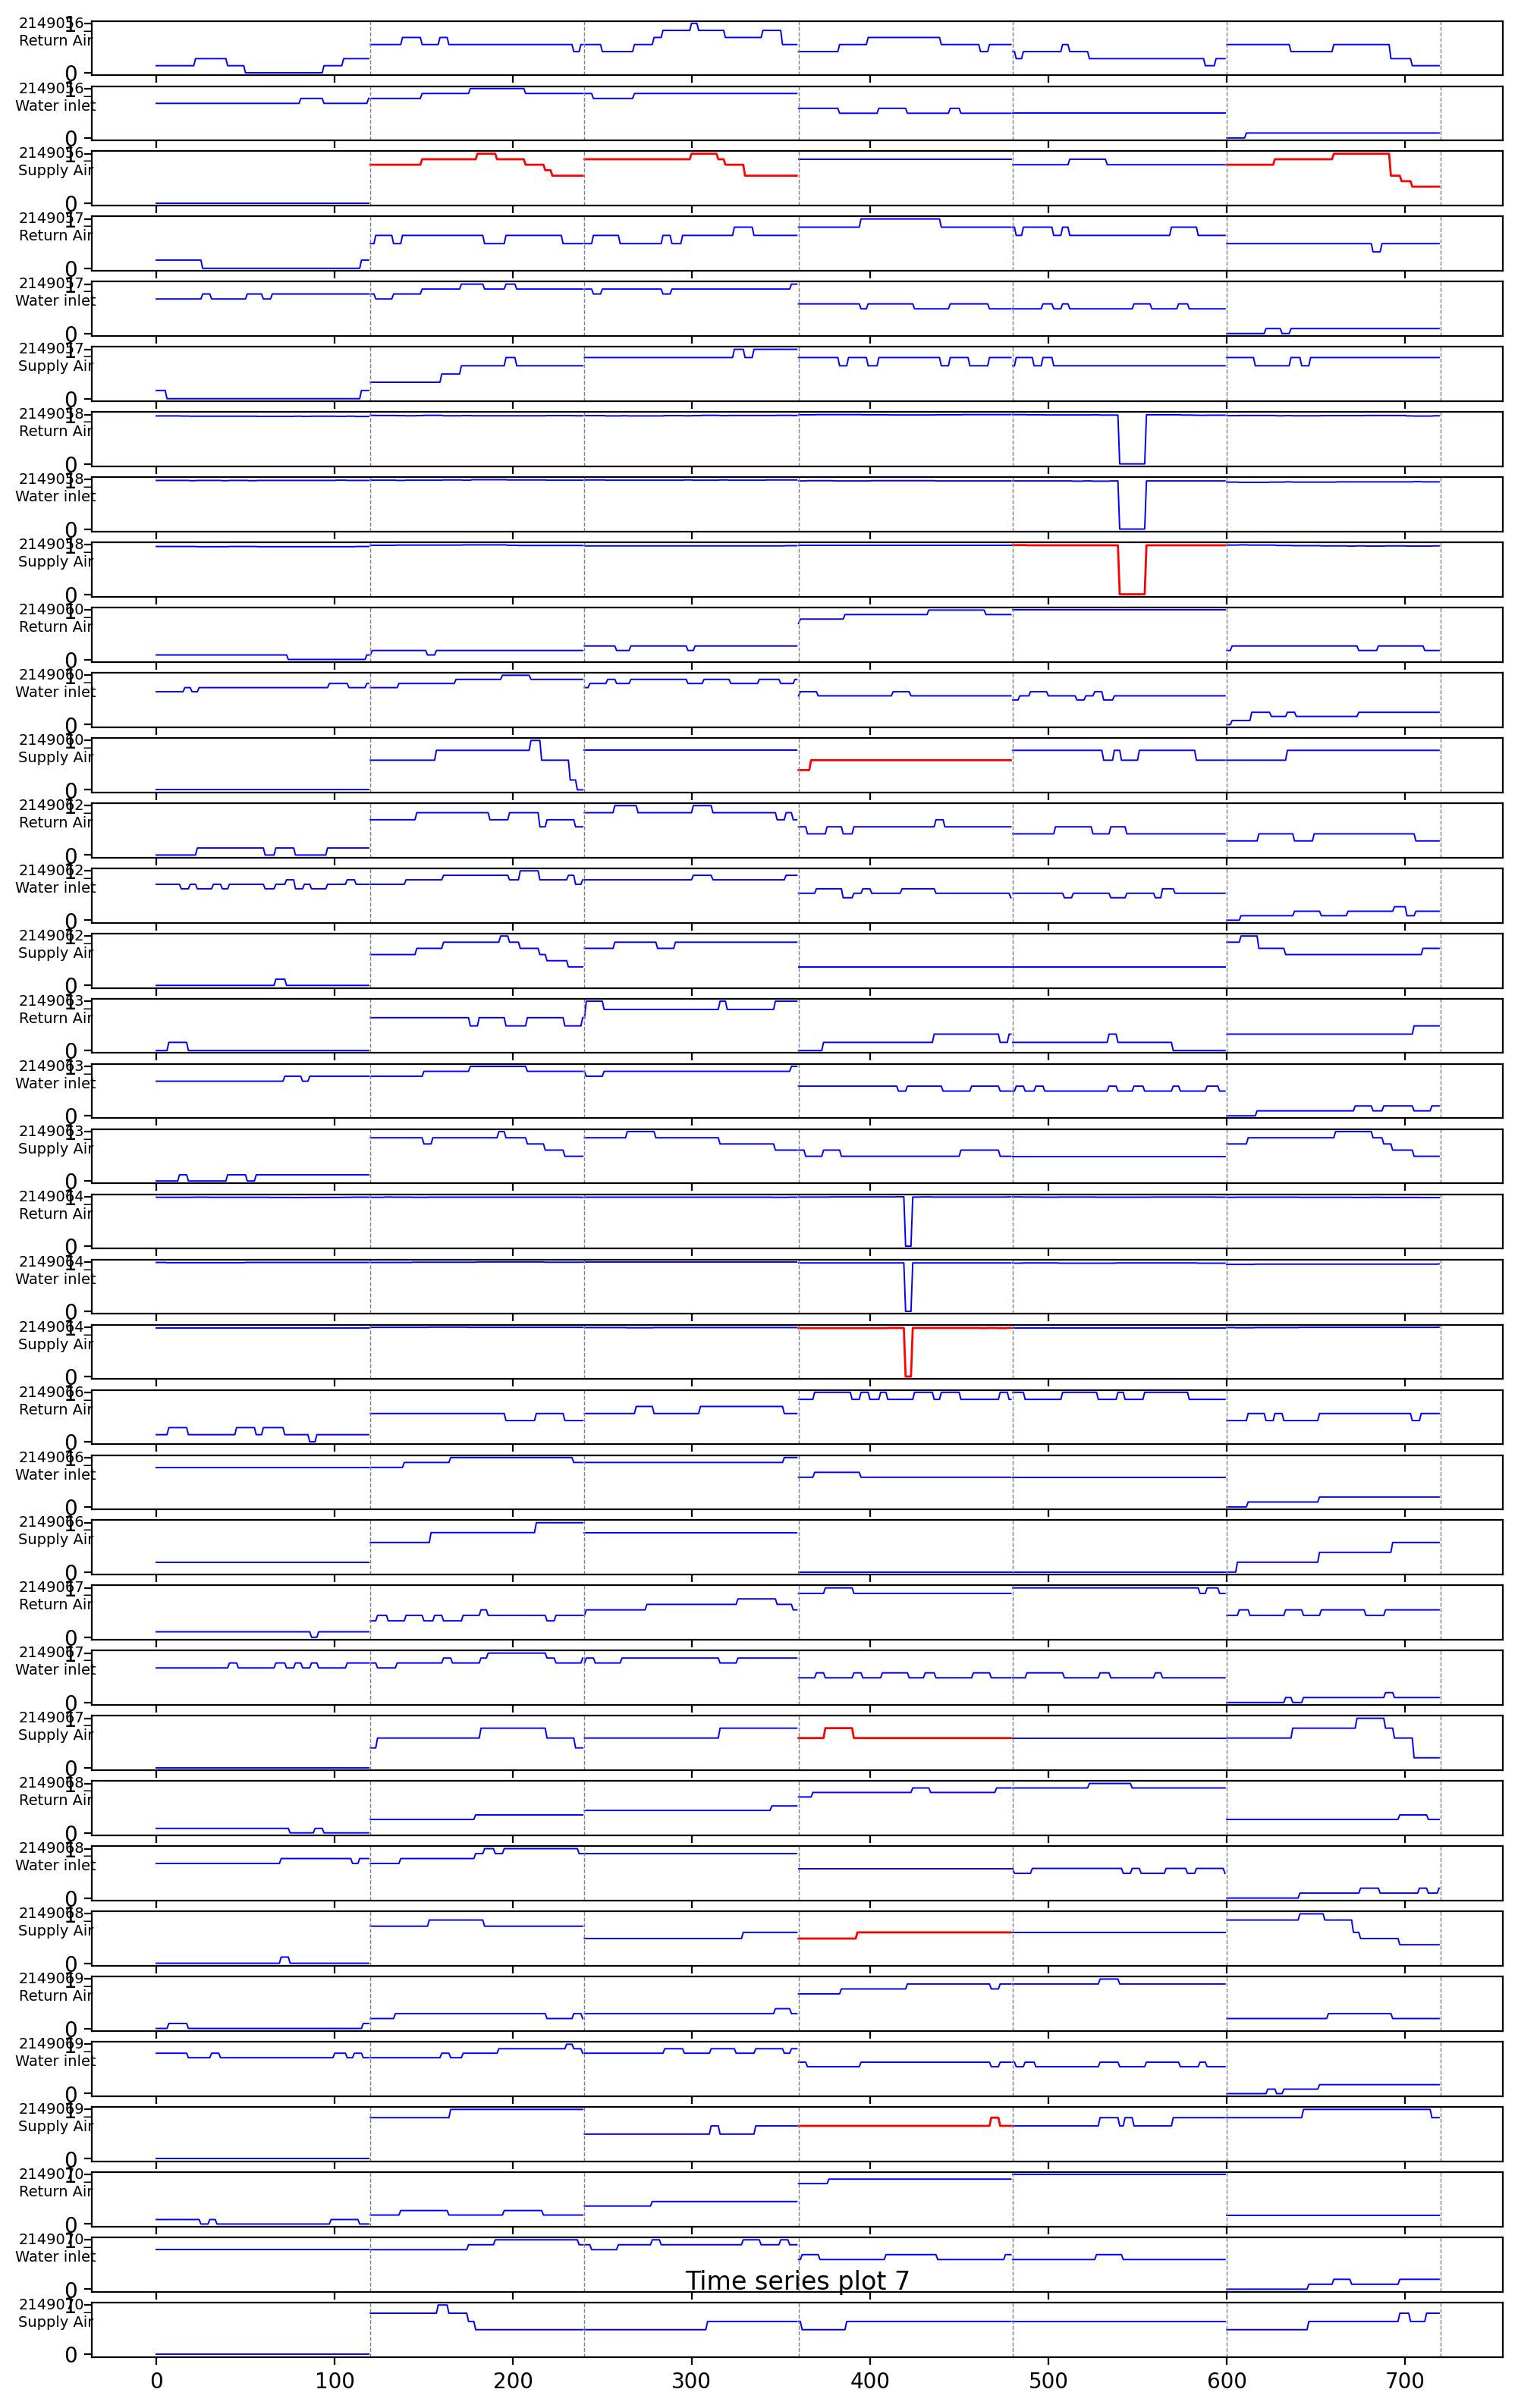

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rc('font', family='SimHei', size=13)
from sklearn.preprocessing import MinMaxScaler

graph =  'upstream_less3' # 'upstream_less3', 'downstream_less'
num_dataset = 7 # 7, 10
time_per_sample = 120
loadpath = f'/home/lipeiwen.lpw/realdata_preprocess/train_data/{graph}/'
savepath = f'./figure/train_data/{graph}/'
nodename = pd.read_csv(f'/home/lipeiwen.lpw/realdata_preprocess/transfered/{graph}/node_name.csv',index_col=0,header=0)

for idataset in range(1,num_dataset+1):

    # 读取数据
    train_data = np.load(loadpath+f'data_interv{idataset}.npy')
    train_data = train_data[:,:int(train_data.shape[1]/2)]
    index_t = np.arange(0, train_data.shape[0])
    with open(loadpath+f'/intervention{idataset}.csv', 'r', encoding='utf-8') as f:
        lines = f.readlines()
    lines = [line.rstrip('\n') for line in lines]
    df_label = pd.DataFrame(lines)
    # 重新插入空行
    for i, line in enumerate(lines):
        if not line:
            df_label.loc[i] = ""

    # 对每列进行minmax标准化处理
    scaler = MinMaxScaler()
    train_data = scaler.fit_transform(train_data)

    # 绘制折线图
    plt.figure(figsize=(12, 20), dpi=200)
    
    for i in range(0, train_data.shape[1]):
        col = col_translate(nodename.iloc[i].values[0])
        # print(col)
        plt.subplot(train_data.shape[1], 1, i+1)
        for regime in range(0,train_data.shape[0],time_per_sample):
            # 获取异常变量列表
            abnormal_vars = list(df_label.iloc[regime,:].values)
            abnormal_list = []
            if regime!=0: # regime==0, no interventional targets
                abnormal_list = [int(num) for num in abnormal_vars[0].split(',')]
            if i in abnormal_list:
                # 异常变量用红色折线
                plt.plot(index_t[regime:regime+time_per_sample],train_data[regime:regime+time_per_sample, i], color='red', label=col, linewidth=1)
            else:
                # 其他变量用蓝色折线
                plt.plot(index_t[regime:regime+time_per_sample],train_data[regime:regime+time_per_sample, i], color='blue', label=col, linewidth=0.7)
        # 在横轴上的每个120的倍数处画一条竖虚线
        for i in range(int(train_data.shape[0] / time_per_sample)):
            plt.axvline(x=(i+1)*time_per_sample, linestyle='--', color='gray', linewidth=0.5)
        plt.ylabel(col,fontsize=7, rotation=0)

    # 设置图例和标题
    # # ax.legend()
    plt.title(f'Time series plot {idataset}')

    # 显示图形
    plt.savefig(savepath+f'data_interv{idataset}.jpg')
    plt.show()
    # plt.savefig(savepath+f'data_interv{idataset}.jpg')

In [8]:
# import matplotlib.pyplot as plt
# import numpy as np

# x = np.arange(0, 360)
# y = np.sin(x * np.pi / 180)

# split_points = [120, 240]

# # fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# # axs[0].plot(x[:split_points[0]], y[:split_points[0]])
# # axs[0].set_title("0-119")

# # axs[1].plot(x[split_points[0]:split_points[1]], y[split_points[0]:split_points[1]])
# # axs[1].set_title("120-239")

# # axs[2].plot(x[split_points[1]:], y[split_points[1]:])
# # axs[2].set_title("240-359")

# # plt.tight_layout()
# # plt.show()

# fig, ax = plt.subplots(figsize=(10, 6))

# ax.plot(x[:split_points[0]], y[:split_points[0]], label="0-119")
# ax.plot(x[:split_points[0]], y[split_points[0]:split_points[1]], label="0-119-2")
# ax.plot(x[split_points[0]:split_points[1]], y[split_points[0]:split_points[1]], label="120-239")
# ax.plot(x[split_points[1]:], y[split_points[1]:], label="240-359")

# ax.legend()
# plt.show()


In [9]:
# import numpy as np
# import matplotlib.pyplot as plt

# # 生成示例数据
# data = np.random.rand(10, 360)

# # 确定分段点的位置
# split_points = [60, 120, 180, 240, 300]

# # 创建子图
# fig = plt.figure(figsize=(12, 8))
# gs = fig.add_gridspec(3, 2)

# # 分别画出每个时间段的数据
# for i in range(len(split_points)+1):
#     ax = fig.add_subplot(gs[i//2, i%2])
#     if i == 0:
#         ax.set_title('0-59')
#         ax.plot(data[:, :split_points[i]])
#     elif i == len(split_points):
#         ax.set_title('301-360')
#         ax.plot(data[:, split_points[i-1]:])
#     else:
#         ax.set_title('{}-{}'.format(split_points[i-1]+1, split_points[i]))
#         ax.plot(data[:, split_points[i-1]:split_points[i]])
    
#     ax.set_xlabel('Time')
#     ax.set_ylabel('Values')

# # 调整子图之间的间距
# plt.tight_layout()

# # 添加图例
# fig.legend(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9', 'Var10'], loc='lower center', ncol=5)

# # 展示图像
# plt.show()
